In [1]:
import os
import numpy as np
import sys
import h5py
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
sys.path.insert(0, os.path.abspath('../heart_rhythm_analysis'))    # make repo root importable

from heart_rhythm_analysis.get_data.CapnoBaseETL import CapnoBaseETL
from heart_rhythm_analysis.get_data.MimicAFETL import MimicAFETL


In [ ]:
def load_as_df(file_path, filename, store_signals=True, bPlot=True):
    import h5py
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

    h5_path = f"{file_path}/{filename}.h5"
    hf = h5py.File(h5_path, "r")

    rows = []
    for subj in hf.keys():
        subj_grp = hf[subj]
        for win_id in subj_grp.keys():
            win_grp = subj_grp[win_id]
            rec_id = win_grp.attrs['rec_id']
            label = win_grp.attrs['label']
            raw_ppg = win_grp["raw_ppg"][:]
            proc_ppg = win_grp["proc_ppg"][:]
            fs = win_grp.attrs["fs"]
            row_data = {
                "subject": subj,
                "window_id": win_id,
                "rec_id": rec_id,
                "label": label,
                "fs_out": fs,
                "raw_len": len(raw_ppg),
                "proc_len": len(proc_ppg),
                "duration_raw_s": len(raw_ppg) / fs,
                "duration_proc_s": len(proc_ppg) / fs
            }
            
            if store_signals:
                row_data["raw_ppg"] = raw_ppg
                row_data["proc_ppg"] = proc_ppg
            
            rows.append(row_data)

    # Build DataFrame
    df = pd.DataFrame(rows)
    print(f"\nTotal windows: {len(df)}")

    if bPlot:
        first = df.iloc[np.random.randint(0, len(df))]
        y = first["proc_ppg"]
        t = np.arange(len(y)) / first.fs_out

        plt.figure(figsize=(8, 3))
        plt.plot(t, y)
        plt.title(f"Subject {first.subject} – Window {first.window_id}\nfs={first.fs_out} Hz")
        plt.xlabel("Time [s]")
        plt.ylabel("Amplitude")
        plt.tight_layout()
        plt.show()

    hf.close()
    return df

# Create Capno Dataset

Saved windows HDF5 to ../data/processed/length_full/capnobase_db/capnobase_db.h5

Total windows: 672
632


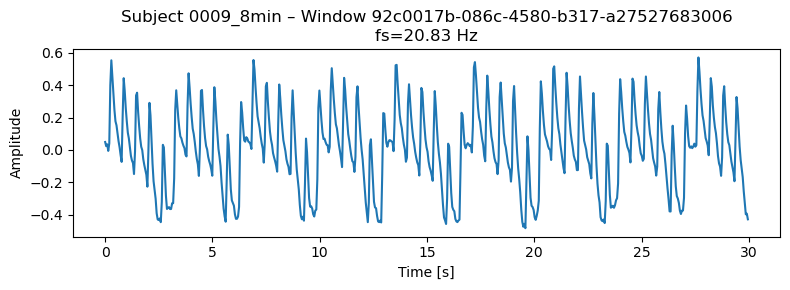

,subject,window_id,rec_id,label,fs_out,raw_len,proc_len,duration_raw_s,duration_proc_s
0,0009_8min,04c76956-7b72-4a53-9076-1434cff3dbd8,0,-1,20.83,9000,625,432.069131,30.004801
1,0009_8min,310293f1-1367-467e-9dd4-cdd85d5471cf,0,-1,20.83,9000,625,432.069131,30.004801
2,0009_8min,477345f7-e947-4c66-bfe8-e3ade7e63ef8,0,-1,20.83,9000,625,432.069131,30.004801
3,0009_8min,4fda80ec-fd31-4aba-a759-8abe9ac5e874,0,-1,20.83,9000,625,432.069131,30.004801
4,0009_8min,5349ac28-afda-4ddc-af0a-9b384396afa9,0,-1,20.83,9000,625,432.069131,30.004801
5,0009_8min,5f80aca6-adc0-43de-bc0b-d3928cd3daa5,0,-1,20.83,9000,625,432.069131,30.004801
6,0009_8min,72df6c26-86b0-4394-8ff7-92cbc7d2ba7e,0,-1,20.83,9000,625,432.069131,30.004801
7,0009_8min,860be7d5-add5-4d9a-8f70-3046e448d72a,0,-1,20.83,9000,625,432.069131,30.004801
8,0009_8min,88718c3a-4d55-44a7-af9f-33443ce586c4,0,-1,20.83,9000,625,432.069131,30.004801
9,0009_8min,92c0017b-086c-4580-b317-a27527683006,0,-1,20.83,9000,625,432.069131,30.004801


In [9]:
# %autoreload 2



def main():
    root_path = os.path.join('../data/raw/capnobase/data/mat')
    out_path = os.path.join('../data/processed/length_full/capnobase_db')
    out_filename = 'capnobase_db'
    if not os.path.exists(out_path):
        os.mkdir(out_path)

    fs_in = 100.00
    fs_out = 20.83

    config = {
    "input_dir"      : root_path,
    "output_dir"     : out_path,
    "window_size_sec": 30,
    "fs_in"          : fs_in,
    "fs_out"   : fs_out,
    "lowpass_cutoff" : (fs_out / 2),
    "fir_numtaps"    : 129,
    "zero_phase"     : True,
    "out_filename" :  out_filename
}
    cfg = {'input_dir': root_path, 'output_dir': out_path}
    etl = CapnoBaseETL(config)
    h5file = etl.process_all()
    print(f"Saved windows HDF5 to {h5file}")
    df = load_as_df(out_path,out_filename)

    display(df.head(10))
    return df
if __name__ == "__main__":
    df_capnobase = main()

# MIMIC III AF DATASET

Loading ../data/raw/mimic_af_nonaf/mimic_af_data.mat
Saved AF windows to ../data/processed/length_full/mimic_af_db/mimic_af_db.h5

Total windows: 7212
2815


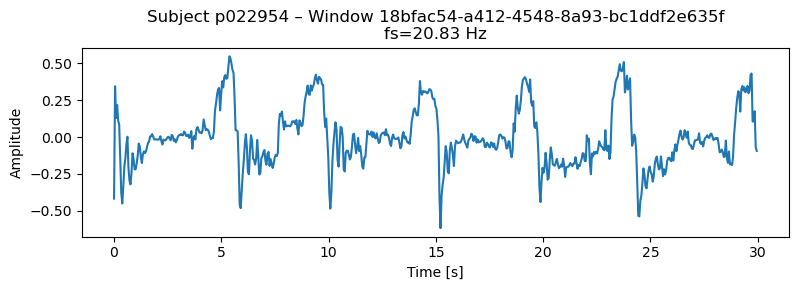

,subject,window_id,rec_id,label,fs_out,raw_len,proc_len,duration_raw_s,duration_proc_s
0,p000946,0022df3b-23d8-4e3f-a1d9-14a8a68385ae,p000946-2120-05-14-08-08,1,20.83,3750,625,180.028805,30.004801
1,p000946,003065e6-d594-48ac-9d1f-5307352a5b86,p000946-2120-05-14-08-08,1,20.83,3750,625,180.028805,30.004801
2,p000946,007f5474-4be3-4ee0-a0bc-0edd05f049d0,p000946-2120-05-14-08-08,1,20.83,3750,625,180.028805,30.004801
3,p000946,010db783-18d3-41ee-b85e-0ff7d31198ee,p000946-2120-05-14-08-08,1,20.83,3750,625,180.028805,30.004801
4,p000946,0270d2f2-4c3e-4983-92a5-bdd18fd99a0e,p000946-2120-05-14-08-08,1,20.83,3750,625,180.028805,30.004801
5,p000946,02837011-84be-4411-83a2-e0197fd54d95,p000946-2120-05-14-08-08,1,20.83,3750,625,180.028805,30.004801
6,p000946,03c9fa91-345b-412a-8664-3800a8402667,p000946-2120-05-14-08-08,1,20.83,3750,625,180.028805,30.004801
7,p000946,0533c28c-2237-4851-bd95-85cd31ee8d9e,p000946-2120-05-14-08-08,1,20.83,3750,625,180.028805,30.004801
8,p000946,0629fc41-9491-4009-ab3f-f0f06d7c7e18,p000946-2120-05-14-08-08,1,20.83,3750,625,180.028805,30.004801
9,p000946,0645d749-6fe4-4e08-b370-69a0474d027a,p000946-2120-05-14-08-08,1,20.83,3750,625,180.028805,30.004801


In [10]:

def main():
    root_path = os.path.join('../data/raw/mimic_af_nonaf/mimic_af_data.mat')
    out_filename = 'mimic_af_db'
    out_path = os.path.join('../data/processed/length_full/mimic_af_db')
    
    if not os.path.exists(out_path):
        os.mkdir(out_path)
    config = {
        "input_dir": root_path,
        "output_dir":  out_path,
        "fs_in": 125.00,
        "fs_out": 20.83,
        "window_size_sec": 30,
        "scale_type": "norm",
        "zero_phase": True,
        "out_filename": out_filename
    }
    
    etl = MimicAFETL(config)
    out_file = etl.process()
    print("Saved AF windows to", out_file)
    df = load_as_df(out_path,out_filename)
    display(df.head(10))
    return df

if __name__ == "__main__":
    df_mimc_af = main()
    

# MIMIC III Non-AF Dataset

Loading ../data/raw/mimic_af_nonaf/mimic_non_af_data.mat
Saved non AF windows to ../data/processed/length_full/mimic_non_af_db/mimic_non_af_db.h5

Total windows: 9412
9227


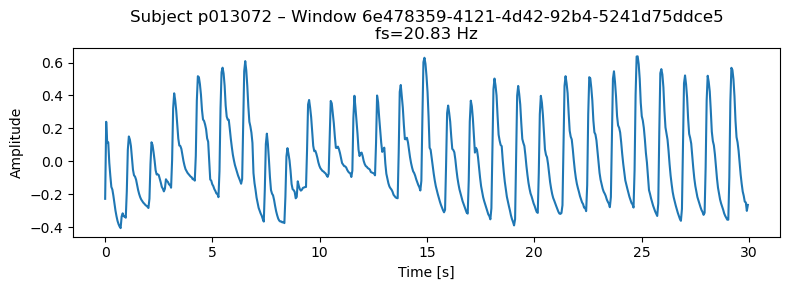

,subject,window_id,rec_id,label,fs_out,raw_len,proc_len,duration_raw_s,duration_proc_s
0,p004829,00025203-a07d-4c7a-baf3-0bfd337d40a6,p004829-2103-08-30-21-52,0,20.83,3750,625,180.028805,30.004801
1,p004829,00613887-32c7-4c16-a3ff-814dc8c87dc8,p004829-2103-08-30-21-52,0,20.83,3750,625,180.028805,30.004801
2,p004829,00902630-06dd-4f67-ad8c-c77317303a52,p004829-2103-08-30-21-52,0,20.83,3750,625,180.028805,30.004801
3,p004829,00c04010-0b9b-4c2c-abf9-1af99bb828d8,p004829-2103-08-30-21-52,0,20.83,3750,625,180.028805,30.004801
4,p004829,00f83df8-0fc8-4ed9-b4b5-2216db2f9a18,p004829-2103-08-30-21-52,0,20.83,3750,625,180.028805,30.004801
5,p004829,01a5f92a-96b0-43c5-8477-382638b7b640,p004829-2103-08-30-21-52,0,20.83,3750,625,180.028805,30.004801
6,p004829,01b8d326-a974-45b8-9aa1-15cc2e128ff5,p004829-2103-08-30-21-52,0,20.83,3750,625,180.028805,30.004801
7,p004829,01cb19a4-947d-414a-a43c-1a0e086119e4,p004829-2103-08-30-21-52,0,20.83,3750,625,180.028805,30.004801
8,p004829,01f25c0e-add8-4c60-8544-d16aae0e3e24,p004829-2103-08-30-21-52,0,20.83,3750,625,180.028805,30.004801
9,p004829,028c48ec-1a40-46a0-b7ab-6568f2b1796f,p004829-2103-08-30-21-52,0,20.83,3750,625,180.028805,30.004801


In [11]:
def main():
    root_path = os.path.join('../data/raw/mimic_af_nonaf/mimic_non_af_data.mat')
    out_filename = 'mimic_non_af_db'
    out_path = os.path.join('../data/processed/length_full/mimic_non_af_db')
    
    if not os.path.exists(out_path):
        os.mkdir(out_path)
    config = {
        "input_dir": root_path,
        "output_dir":  out_path,
        "fs_in": 125.00,
        "fs_out": 20.83,
        "window_size_sec": 30,
        "scale_type": "norm",
        "zero_phase": True,
        "out_filename": out_filename   
    }

    etl = MimicAFETL(config)
    out_file = etl.process()
    print("Saved non AF windows to", out_file)
    df = load_as_df(out_path,out_filename)
    display(df.head(10))
    return df
if __name__ == "__main__":
    df_mimc_nonaf = main()

# MIMIC III Ethnicity Subset

Loading ../data/raw/mimic_ethnicity_data/mimic_ethnicity_struct_output.mat
Saved General MIMIC III - Ethnicity windows to ../data/processed/length_full/mimic_ethnicity_db/mimic_ethnicity_db.h5

Total windows: 596
82


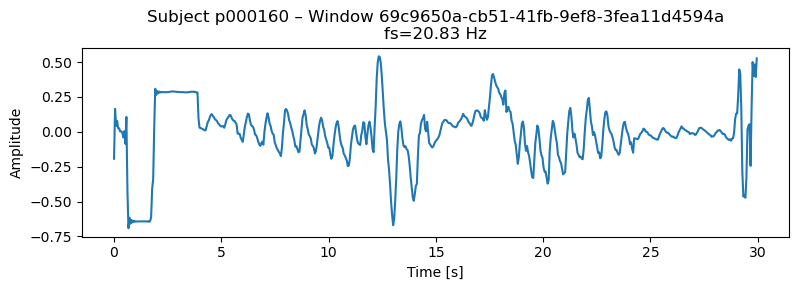

,subject,window_id,rec_id,label,fs_out,raw_len,proc_len,duration_raw_s,duration_proc_s
0,p000107,00890e8b-c921-4ce0-9cde-4626c6de6c91,3860035_0031,-1,20.83,3750,625,180.028805,30.004801
1,p000107,0788452f-a0aa-4604-8fec-bfb05702419a,3860035_0031,-1,20.83,3750,625,180.028805,30.004801
2,p000107,08324611-bfe1-4f3e-9c62-d27884e82cb6,3860035_0031,-1,20.83,3750,625,180.028805,30.004801
3,p000107,086fcd2c-504a-476e-bc44-49bce164b356,3860035_0031,-1,20.83,3750,625,180.028805,30.004801
4,p000107,0b5afe30-08e8-491f-8fef-b3ee3b8c283c,3860035_0031,-1,20.83,3750,625,180.028805,30.004801
5,p000107,0ddd483d-6b9f-4ebd-b297-e2cb8601add7,3860035_0031,-1,20.83,3750,625,180.028805,30.004801
6,p000107,0e4a0f0c-8188-4c5a-9ba2-081ed1cc1d9e,3860035_0031,-1,20.83,3750,625,180.028805,30.004801
7,p000107,0f61179f-b2f0-4ba3-ba59-0a7df586e48d,3860035_0031,-1,20.83,3750,625,180.028805,30.004801
8,p000107,15d4ce01-0262-4d45-aed1-b8589327d534,3860035_0031,-1,20.83,3750,625,180.028805,30.004801
9,p000107,17f004ec-b869-4514-8de0-0e893d6327e3,3860035_0031,-1,20.83,3750,625,180.028805,30.004801


In [12]:
def main():
    root_path = os.path.join('../data/raw/mimic_ethnicity_data/mimic_ethnicity_struct_output.mat')
    out_filename = 'mimic_ethnicity_db'
    out_path = os.path.join('../data/processed/length_full/mimic_ethnicity_db')
    
    if not os.path.exists(out_path):
        os.mkdir(out_path)
    config = {
        "input_dir": root_path,
        "output_dir":  out_path,
        "fs_in": 125.00,
        "fs_out": 20.83,
        "window_size_sec": 30,
        "scale_type": "norm",
        "zero_phase": True,
        "out_filename": out_filename 
    }
    
    etl = MimicAFETL(config)
    out_file = etl.process()
    print("Saved General MIMIC III - Ethnicity windows to", out_file)
    df = load_as_df(out_path,out_filename)
    display(df.head(10))
    return df
if __name__ == "__main__":
    df_mimic_gen = main()

In [28]:
all_subjects = df_mimic_gen['subject'].unique()
all_subjects

array(['p000107', 'p000124', 'p000160', 'p000188', 'p000333', 'p000543',
       'p000618', 'p000652', 'p000735', 'p000773'], dtype=object)

In [ ]:
df_capnobase['subject'].unique()
df_mimc_nonaf['subject'].unique()
df_mimc_nonaf['subject'].unique()
df_mimic_gen['subject'].unique()

['p000946-2120-05-14-08-08' 'p022954-2136-02-29-17-52'
 'p025117-2202-03-15-20-28' 'p026377-2111-11-17-16-46'
 'p050089-2157-08-23-16-37' 'p063039-2157-03-29-13-35'
 'p068956-2107-04-21-16-05' 'p069339-2133-12-09-21-14'
 'p075371-2119-08-22-00-53' 'p077729-2120-08-31-01-03'
 'p079998-2101-10-21-21-31' 'p081349-2120-02-11-06-35'
 'p085866-2178-03-20-17-11' 'p087275-2108-08-29-12-53'
 'p089565-2174-05-12-00-07' 'p092846-2129-12-21-13-12'
 'p094847-2112-02-12-19-56']
['p004829-2103-08-30-21-52' 'p013072-2194-01-22-16-13'
 'p015852-2148-05-03-18-39' 'p016684-2188-01-29-00-06'
 'p019608-2125-02-05-04-57' 'p023824-2182-11-27-14-22'
 'p026964-2147-01-11-18-03' 'p029512-2188-02-27-18-10'
 'p050384-2195-01-30-02-21' 'p055204-2132-06-30-09-34'
 'p058932-2120-10-13-23-15' 'p062160-2153-10-03-14-49'
 'p063628-2176-07-02-20-38' 'p087675-2104-12-05-03-53'
 'p097547-2125-10-21-23-43']
['3860035_0031' '3931528_0188' '3531764_0003' '3285727_0015'
 '3092245_0062' '3047369_0011' '3481389_0008' '3488442_0

ValueError: operands could not be broadcast together with shapes (15,) (17,) 